<p style="text-align: right;"> Nicolas Dronchi </p>

# Day 18 In-Class Assignment: Machine Learning

<img src="http://blog.bidmotion.com/wp-content/uploads/sites/3/2016/06/supervised-workflow-machine-learning.png" width=700px>

1. **Scientific motivation** 
    - Face Recognition
2. **Modeling tools** 
    - Machine Learning (Support Vector Machines)
3. **Programming concepts** 
    - Discovering existing code
    - Some examples of reusable code
4. **Python Programming Concepts** 
    - Sci-kit learn
    
    

### Agenda for today's class

</p>

1. Review pre-class assignment
1. Problem Statement
1. Example using the digits dataset
1. Face Recognition

---
# 1. Review of Pre-Class assignment

We'll discussion any questions that came up as a class.

----
# 2. Problem Statement
What if we wanted to build a model to do face recognition? Ideally, the model would take an image as an input and return the name of the person represented in the image.

&#9989; **Do This:** As a group, discuss things you could do with a face recognition model and record the ideas that come up.

put it in an iphone and call it face id.

Get a job at the NSA and go full 1984.

Taging people on facebook. Also marketing towards you based on your friends.

#### Defining the features and building the model

If you review the image at the top of the notebook, you might notice that one of the first steps in machine learning is to go from "raw data" into a set of "features" and "labels", which we discussed a bit about when we worked with the perceptron model. Extracting features from our data can sometimes be one of the trickier parts of the process and also one of the most important ones. We have to think carefully about exactly what the "right" features are for training our machine learning algorithm and, when possible, it is advantageous to find ways to reduce the total number of features we are trying to model. Once we define our features, we can build out model.

&#9989; **Do This:** Now, also as a group, discuss and be prepared to share with the class how you would define a feature vector from an image and how you would build a face recognition model using machine learning.  Can you find any libraries that you think would be will suited for this? Which of these libraries might you actually use?

Eye color, skin color, any distance between eyes, ears, mouth, and nose

scikit learn is really good at machine learning and can do anything

----
# 3. Example using the digits dataset

Let's start with downloading a dataset called "digits" which is included in the sklearn library. Pay special attention to the new library import that we're going to use! The `sklearn` module that *many* submodules.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = load_digits();

In [2]:
#Cool slider to browse all of the images.
from ipywidgets import interact
def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

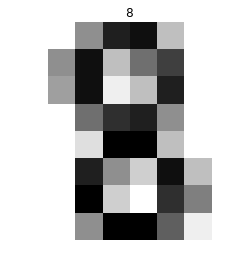

In [3]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

Now let's inspect the digits arrays to find out what the shapes of the arrays (which can help for plotting the data with matplotlib). **Review the code below and make sure you know what it is doing.**

In [4]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

**Question**: Write some code to print out the number of samples, number of features, number of classes, and the shape of the image dimensions:

In [11]:
#Put your answer to the above question here
print("number of samples", N)
print("number of features", n_features)
print("number of classes", n_classes)
print("shape of the image dimensions", h, "x", w)

number of samples 1797
number of features 64
number of classes 10
shape of the image dimensions 8 x 8


**Question**: As a group discuss the difference between the features, samples, and classes.  How do these relate to the shape of the image?  Write down a quick definition of each (the first one has been done for you):

1. **n_samples:** Total number of images in the digits dataset. 
2. **n_features:** Number of features that we are comparing
3. **n_classes:** Number of distinctions that we are putting each element into
4. **N:** Number of samples for pictures
5. **h:** height of each sample
6. **w:** width of each sample


#### Distribution of classes in our data

Let's have a look at the distribution of samples across the target classes:

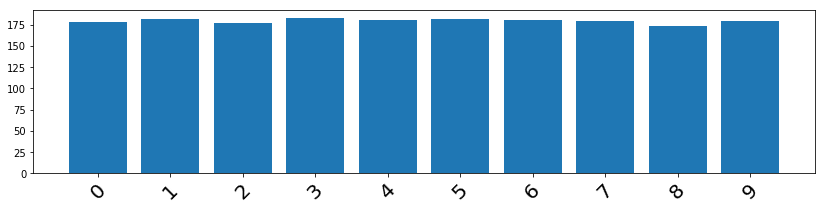

In [15]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

----
## Step A: Splitting the dataset for model into training and testing sets
Let's split the data in a training set and final testing set. We want to randomly select 75% of the data for training and 25% of the data for testing.  

&#9989; Do This - As a group, come up with a way to split the input data into separate training and testing sets.  Make sure you keep the feature vectors and classes together.  

**BIG HINT**: This is a very common step in machine learning, maybe there exists a function to do this for you? I bet you can find an example for this exact problem online.

In [23]:
from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.33)
print(train_vectors.shape, test_vectors.shape, feature_vectors.shape)
print(len(class_labels))
# test_vectors = feature_vectors
# train_labels, test_labels = train_test_split(class_labels)

(1203, 64) (594, 64) (1797, 64)
1797


**Question**: Why do we need to separate our samples into a training and testing set. Why can't we just use all the data for both? Wouldn't that make it work better?

It leaves room to test if your algorithm works. It also eliminates biases. 

----
## Step B: Train a SVM Classifier based on the training dataset.

The following code will train the Support Vector Machine (SVM).  The resulting model will be called ```clf``` for classifier.  Note that there is a lot is going on in these functions.  We will not get into all of the details, lets just accept the following values as reasonable starting points (actually, these values came from an example  found online):

In [24]:
###############################################################################
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Runtime 25.282546281814575


&#9989; **DO THIS**: Explore the ```clf``` object. What functions does it have access to?  Can you figure out what function you may use to input a unknown feature vector and make a class prediction?

In [31]:
## DO THIS, put your exploration code here.
print(clf.predict(test_vectors[0:10]))
print(test_labels[0:10])

[2 8 9 7 9 5 8 1 9 1]
[2 8 9 7 9 5 8 1 9 1]


----
## Step C. Show the results of the classification on the testing dataset.

In [32]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = test_vectors
true_lables = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))


Predicting names on the test set
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        54
          1       1.00      1.00      1.00        62
          2       1.00      1.00      1.00        56
          3       1.00      0.98      0.99        64
          4       1.00      1.00      1.00        56
          5       0.95      1.00      0.98        61
          6       1.00      0.97      0.98        65
          7       0.98      0.98      0.98        61
          8       0.96      1.00      0.98        52
          9       0.98      0.95      0.97        63

avg / total       0.99      0.99      0.99       594

[[54  0  0  0  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0 63  0  0  0  1  0  0]
 [ 0  0  0  0 56  0  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0  1 63  0  1  0]
 [ 0  0  0  0  0  0  0 60  0  1]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  2  0  0  1 60

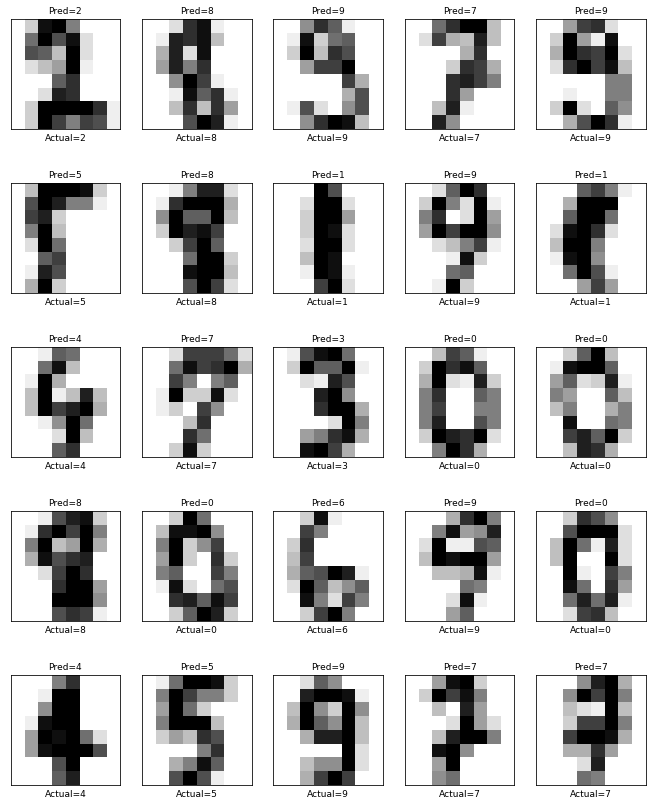

In [34]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title('Pred='+str(categories[pred_titles[i]]), size=9)
        plt.xlabel('Actual='+str(categories[true_titles[i]]), size=9)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_vectors, test_labels, pred_labels, h,w)

**Question:** How well is the classifier doing with the digits dataset? Comment on what information the classification report and confusion matrix provide you.

The classification reports that it identifies all the numbers fairly well. It is the worst at identifing the number 5 where it confuses it with 9 and 6. 

**Questions:** What if you created a new random training set from the images using the same fraction of images? What if you just used all of the data -- does it work better or worse? Why?

It re-rolls the numbers chosen for training and testing. If we used all the data, it should get them all correct because it is biased towards our data.

# 4. Face Recognition

Now that we have completed the example for digits dataset. Lets do it again with some faces. Fortunately, scikit-learn comes with a face dataset in exactly the same format as the digits dataset.  This means we should just be able to swap out one with the other. Here is the code for importing the faces data.  This code ensures there are at least 50 faces per person and they are resized to 40%.  

```sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)```

In [37]:
#couldn't get this to work
sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

ImportError: The Python Imaging Library (PIL) is required to load data from jpeg files

&#9989; **DO THIS**:  Repeat the entire process using the face database imported with the command shown above. Answer the following questions.

In [ ]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.33)

start = time.time()
#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

In [ ]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

#make some temporary variables so you can change this easily
predict_vectors = test_vectors
true_lables = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))


**Question:** How long did it take to train the face recognition classifier?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

**Question:** How well did the SVM algorithm work on the face recognition problem?  Can you think of real world applications where this level of face recognition may be acceptable?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

**Question:** Why is the face recognition not working as well?  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

**Question:** Give some example science problems where this type of machine learning classification (SVM) may be used.

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
# Assignment Wrap-up

Fill out the following Google Form before submitting your assignment to D2L!

In [38]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/K0XoZ84GDUNM6m8A2" 
	width="80%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2017,  Michigan State University Board of Trustees